## **Logistic Regression** - Titanic dataset

Logistic regression is a supervised learning classification alogorithm used to predict the probability of the targeted variable. Some of the examples of classification problems are email spam or not spam, Online Transaction: fraud or not fraud, etc. Logistic regression transforms its output using logistic sigmoid function to return a probability value.

For this Logistic Regression, I would like to consider the dataset of titanic. I will build the model which can predict if the passeger is going to survive or not

**Importing Libraries**

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [113]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Loading Titanic Dataset**

In [114]:
dataset = sns.load_dataset('titanic')

In [115]:
dataset.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [116]:
dataset.shape

(891, 15)

In [117]:
dataset.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Data Understanding**

In [12]:
dataset.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [118]:
dataset.shape

(891, 15)

In [29]:
dataset.shape[0]

891

In [119]:
dataset.shape[1]

15

In this titanic dataset, there are 891 passegers information found from the total passagers estimated to be 2,224 and 1500 passegers were died. There were many informations missed in this dataset. The following information are missing. 
1. Age is missing for 177 passengers
2. Deck is missing fvor 688 passengers
3. Embarked is missing for 2 passengers
4. Embark_town is missing for 2 passgers

If the data is missing for more than 50%, then it is advisable to drop the feature. In this case, missing information for deck feature is more than 50%, so, we will drop this feature 'deck' in our analysis

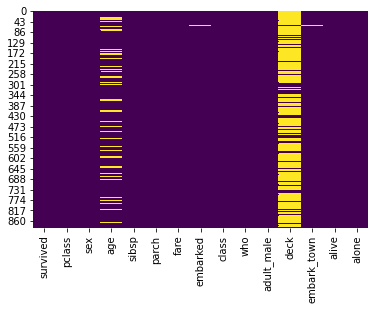

In [120]:
## Pictorial representation of the missing feature values
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')

In [121]:
### Calculating the percentage of the records for which age is found in the dataset
dataset['age'].isnull().sum()/dataset.shape[0]*100

19.865319865319865

Text(0.5, 0, 'Age')

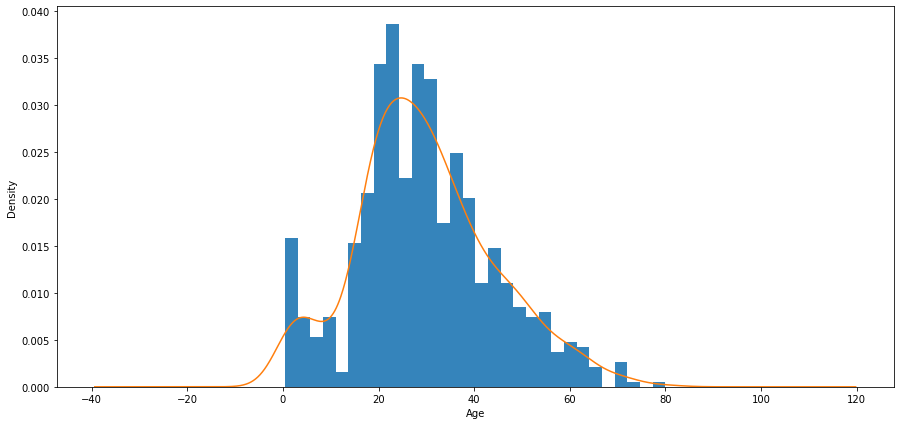

In [122]:
### Histogram
ax = dataset['age'].hist(bins = 30, density=True, alpha=0.9, figsize=(15,7))
dataset['age'].plot(kind='density')
ax.set_xlabel('Age')

Text(0.5, 1.0, 'Male')

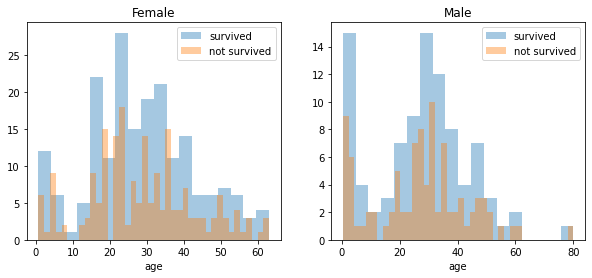

In [58]:
survived = 'survived'
not_survived ='not survived'

fig, axes = plt.subplots(nrows =1, ncols=2, figsize= (10,4))
women = dataset[dataset['sex'] == 'female']
men = dataset[dataset['sex'] == 'male']

ax = sns.distplot(women[women[survived]==1].age.dropna(), bins= 18, label = survived, ax = axes[0], kde = False)
ax = sns.distplot(women[women[survived]==1].age.dropna(), bins= 40, label = not_survived, ax = axes[0], kde = False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men[survived]==1].age.dropna(), bins= 18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men[survived]==1].age.dropna(), bins= 40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

In [62]:
dataset['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [65]:
dataset.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


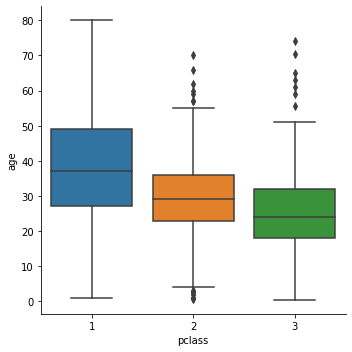

In [66]:
### Finding the relationship between 'pclass' and 'age'

sns.catplot(x='pclass', y='age', data = dataset, kind ='box')

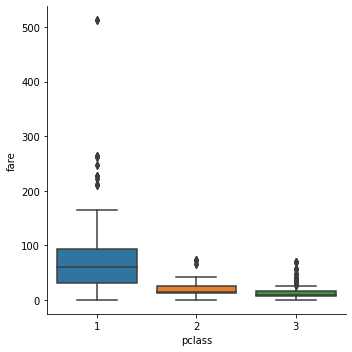

In [67]:
sns.catplot(x='pclass', y = 'fare', data = dataset, kind = 'box')

In [68]:
dataset[dataset['pclass'] == 1]['age'].mean()

38.233440860215055

In [69]:
dataset[dataset['pclass']==2]['age'].mean()

29.87763005780347

In [70]:
dataset[dataset['pclass']==3]['age'].mean()

25.14061971830986

In [77]:
dataset['age'].mean()

30.04083067078447

In [123]:
### Imputing missing age values

def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return dataset[dataset['pclass'] == 1]['age'].mean()
        elif pclass == 2:
            return dataset[dataset['pclass'] == 2]['age'].mean()
        elif pclass == 3:
            return dataset[dataset['pclass'] == 3]['age'].mean()

    else:
        return age

In [124]:
dataset['age'] = dataset[['age', 'pclass']].apply(impute_age, axis = 1)

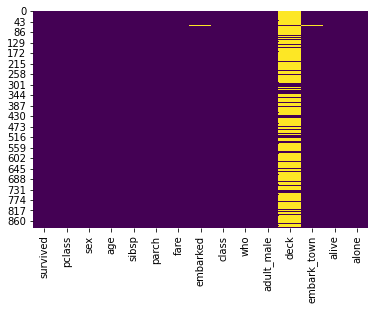

In [125]:
sns.heatmap(dataset.isnull(), cbar = False, cmap = 'viridis')

In [85]:
dataset.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.00000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.00000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.00000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,25.14062,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.00000,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.00000,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.00000,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.00000,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


**Analysing Embarked**

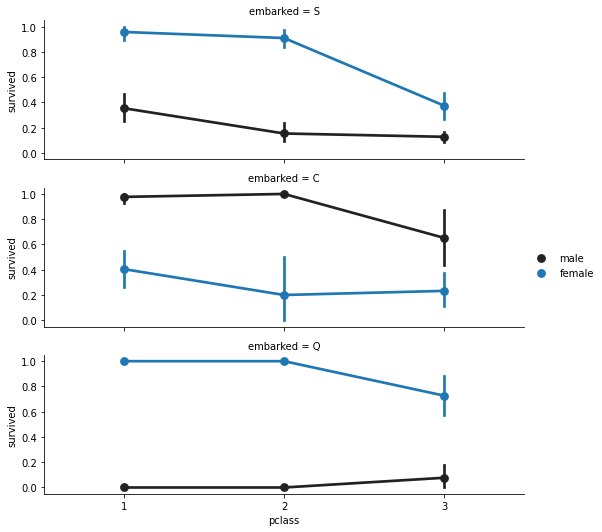

In [126]:
f = sns.FacetGrid(dataset, row= 'embarked', height=2.5, aspect = 3)
f.map(sns.pointplot, 'pclass', 'survived', 'sex', order=None, hue_order=None)

f.add_legend()

In [127]:
dataset['embarked'].isnull().sum()

2

In [128]:
dataset['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

Maximum of embarked from Southempton 'S', we can assign this value to the missing values

In [129]:
common_value = 'S'
dataset['embarked'].fillna(common_value, inplace=True)

In [130]:
dataset['embarked'].isnull().sum()

0

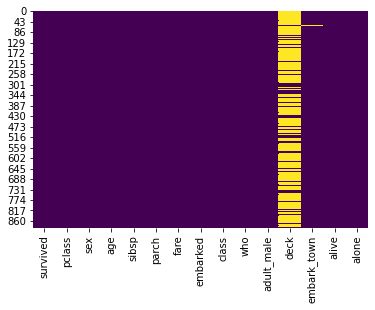

In [131]:
sns.heatmap(dataset.isnull(), cbar = False, cmap = 'viridis')

**Dropping feature 'deck' and other features 'embark_town', 'alive**

In [132]:
dataset.drop(labels=['deck', 'embark_town', 'alive'], inplace=True, axis=1)

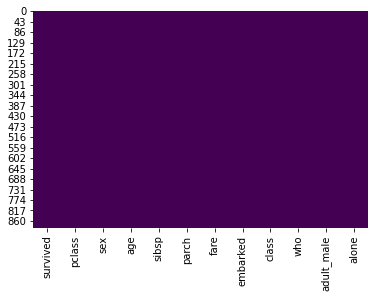

In [133]:
sns.heatmap(dataset.isnull(), cbar = False, cmap = 'viridis')

In [134]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB


In [135]:
dataset['fare'] = dataset['fare'].astype('int')
dataset['age'] = dataset['age'].astype('int')
dataset['pclass'] = dataset['pclass'].astype('int')

In [100]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    int64   
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    int64   
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), int64(6), object(3)
memory usage: 65.5+ KB


**Convert categorical data into numerical data**

In [136]:
genders = {'male': 0, 'female': 1}

dataset['sex'] = dataset['sex'].map(genders)

In [137]:
dataset.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22,1,0,7,S,Third,man,True,False
1,1,1,1,38,1,0,71,C,First,woman,False,False
2,1,3,1,26,0,0,7,S,Third,woman,False,True
3,1,1,1,35,1,0,53,S,First,woman,False,False
4,0,3,0,35,0,0,8,S,Third,man,True,True
5,0,3,0,25,0,0,8,Q,Third,man,True,True
6,0,1,0,54,0,0,51,S,First,man,True,True
7,0,3,0,2,3,1,21,S,Third,child,False,False
8,1,3,1,27,0,2,11,S,Third,woman,False,False
9,1,2,1,14,1,0,30,C,Second,child,False,False


In [138]:
who = {'man':0, 'woman':1, 'child':2}
dataset['who'] = dataset['who'].map(who)

In [139]:
dataset.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22,1,0,7,S,Third,0,True,False
1,1,1,1,38,1,0,71,C,First,1,False,False
2,1,3,1,26,0,0,7,S,Third,1,False,True
3,1,1,1,35,1,0,53,S,First,1,False,False
4,0,3,0,35,0,0,8,S,Third,0,True,True
5,0,3,0,25,0,0,8,Q,Third,0,True,True
6,0,1,0,54,0,0,51,S,First,0,True,True
7,0,3,0,2,3,1,21,S,Third,2,False,False
8,1,3,1,27,0,2,11,S,Third,1,False,False
9,1,2,1,14,1,0,30,C,Second,2,False,False


In [140]:
adult_male = {True:1, False:0}
dataset['adult_male'] = dataset['adult_male'].map(adult_male)

In [141]:
dataset.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22,1,0,7,S,Third,0,1,False
1,1,1,1,38,1,0,71,C,First,1,0,False
2,1,3,1,26,0,0,7,S,Third,1,0,True
3,1,1,1,35,1,0,53,S,First,1,0,False
4,0,3,0,35,0,0,8,S,Third,0,1,True
5,0,3,0,25,0,0,8,Q,Third,0,1,True
6,0,1,0,54,0,0,51,S,First,0,1,True
7,0,3,0,2,3,1,21,S,Third,2,0,False
8,1,3,1,27,0,2,11,S,Third,1,0,False
9,1,2,1,14,1,0,30,C,Second,2,0,False


In [142]:
alone = {True : 1, False : 0}
dataset['alone'] = dataset['alone'].map(alone)

In [143]:
dataset.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22,1,0,7,S,Third,0,1,0
1,1,1,1,38,1,0,71,C,First,1,0,0
2,1,3,1,26,0,0,7,S,Third,1,0,1
3,1,1,1,35,1,0,53,S,First,1,0,0
4,0,3,0,35,0,0,8,S,Third,0,1,1
5,0,3,0,25,0,0,8,Q,Third,0,1,1
6,0,1,0,54,0,0,51,S,First,0,1,1
7,0,3,0,2,3,1,21,S,Third,2,0,0
8,1,3,1,27,0,2,11,S,Third,1,0,0
9,1,2,1,14,1,0,30,C,Second,2,0,0


In [144]:
ports = {'S' : 0, 'C' : 1, 'Q' : 2}
dataset['embarked'] = dataset['embarked'].map(ports)

In [145]:
dataset.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22,1,0,7,0,Third,0,1,0
1,1,1,1,38,1,0,71,1,First,1,0,0
2,1,3,1,26,0,0,7,0,Third,1,0,1
3,1,1,1,35,1,0,53,0,First,1,0,0
4,0,3,0,35,0,0,8,0,Third,0,1,1
5,0,3,0,25,0,0,8,2,Third,0,1,1
6,0,1,0,54,0,0,51,0,First,0,1,1
7,0,3,0,2,3,1,21,0,Third,2,0,0
8,1,3,1,27,0,2,11,0,Third,1,0,0
9,1,2,1,14,1,0,30,1,Second,2,0,0


In [146]:
dataset.drop(labels = ['class'], axis = 1, inplace=True)

In [147]:
dataset.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,0,22,1,0,7,0,0,1,0
1,1,1,1,38,1,0,71,1,1,0,0
2,1,3,1,26,0,0,7,0,1,0,1
3,1,1,1,35,1,0,53,0,1,0,0
4,0,3,0,35,0,0,8,0,0,1,1
5,0,3,0,25,0,0,8,2,0,1,1
6,0,1,0,54,0,0,51,0,0,1,1
7,0,3,0,2,3,1,21,0,2,0,0
8,1,3,1,27,0,2,11,0,1,0,0
9,1,2,1,14,1,0,30,1,2,0,0


**Build Logistic Regression Model**

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [150]:
x = dataset.drop('survived', axis=1)
y = dataset['survived']

In [151]:
x.head(10)

,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,3,0,22,1,0,7,0,0,1,0
1,1,1,38,1,0,71,1,1,0,0
2,3,1,26,0,0,7,0,1,0,1
3,1,1,35,1,0,53,0,1,0,0
4,3,0,35,0,0,8,0,0,1,1
5,3,0,25,0,0,8,2,0,1,1
6,1,0,54,0,0,51,0,0,1,1
7,3,0,2,3,1,21,0,2,0,0
8,3,1,27,0,2,11,0,1,0,0
9,2,1,14,1,0,30,1,2,0,0


In [152]:
y.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: survived, dtype: int64

In [153]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [154]:
x_train.shape

(596, 10)

In [156]:
x_test.shape

(295, 10)

In [163]:
model = LogisticRegression(solver = 'lbfgs', max_iter= 350)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)


In [164]:
model.score(x_test, y_test)

0.8305084745762712